In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [141]:
df = pd.read_csv('Salary_cleaned_data.csv')
df['Company Name'] = df['Company Name'].apply(lambda x:x.replace('\n',''))
df['Salary Estimate'] = df['Salary Estimate'].apply(lambda x:x/1000)
df.head()


,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Size,Founded,Type of ownership,Industry,...,Revenue,Job_country,Job_state,Company_Year,python_yn,visualization_yn,Excel_yn,analysis_yn,communication_yn,aws_yn
0,1,Senior Data Scientist,140.363,About Shift:\nWe believe car buying should be ...,3.6,Shift,1001 to 5000 Employees,2014,Company - Private,Internet,...,Unknown / Non-Applicable,Los Angeles,CA,8,0,0,0,0,0,0
1,4,Staff Data Scientist,195.000,Emergency room visits and hospital stays can b...,3.0,DispatchHealth,1001 to 5000 Employees,2015,Company - Private,Health Care Services & Hospitals,...,Unknown / Non-Applicable,San Francisco,CA,7,0,0,0,0,0,0
2,6,Entry Level Data Scientist: 2022,92.332,"Introduction\nAs a Data Scientist at IBM, you ...",4.0,IBM,10000+ Employees,1911,Company - Public,IT Services,...,$10+ billion (USD),Research Triangle Park,NC,111,0,0,0,0,0,0
3,7,Data Scientist,108.739,About Us\nNativo empowers brands and publisher...,4.0,Nativo,51 to 200 Employees,2010,Company - Private,Internet,...,Unknown / Non-Applicable,Los Angeles,CA,12,0,0,0,0,1,0
4,8,Senior Data Scientist (Remote),142.500,About Celsius Network\n\nCelsius addresses the...,3.3,Celsius,201 to 500 Employees,2017,Company - Private,Lending,...,Unknown / Non-Applicable,Hoboken,NJ,5,0,0,0,0,0,0


In [160]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'

In [143]:
#lets create a job discription length 
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
df['desc_len']

0       828
1      1435
2      1313
3       941
4      1218
       ... 
573     271
574     924
575     944
576    1284
577    1858
Name: desc_len, Length: 578, dtype: int64

In [183]:
df['Job_Title'] = df['Job Title'].apply(title_simplifier)
df['Job_Title'] = df['Job_Title'].apply(lambda x:'data scientist' if x=='na' else x)


In [184]:
df.Job_Title.value_counts()

data scientist    504
analyst            35
director           21
manager            18
Name: Job_Title, dtype: int64

In [191]:
df['seniority'] = df['Job Title'].apply(seniority)
df.seniority.value_counts()

na        347
senior    231
Name: seniority, dtype: int64

In [146]:
df.columns

Index(['index', 'Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Size', 'Founded', 'Type of ownership', 'Industry',
       'Sector', 'Revenue', 'Job_country', 'Job_state', 'Company_Year',
       'python_yn', 'visualization_yn', 'Excel_yn', 'analysis_yn',
       'communication_yn', 'aws_yn', 'desc_len', 'Job_Title', 'seniority'],
      dtype='object')

In [147]:
df.describe()

,index,Salary Estimate,Rating,Founded,Company_Year,python_yn,visualization_yn,Excel_yn,analysis_yn,communication_yn,aws_yn,desc_len
count,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000
mean,352.697232,136.808125,4.041696,1980.124567,41.875433,0.108997,0.128028,0.053633,0.147059,0.093426,0.048443,1313.806228
std,200.247689,24.849283,0.357308,42.944828,42.944828,0.311905,0.334410,0.225488,0.354471,0.291280,0.214886,1232.971366
min,1.000000,67.548000,3.000000,1862.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.000000
25%,175.250000,119.944000,3.900000,1972.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,773.000000
50%,354.000000,139.731000,4.100000,1999.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,974.000000
75%,524.750000,150.200000,4.400000,2010.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1277.000000
max,699.000000,199.000000,5.000000,2020.000000,160.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8207.000000


<AxesSubplot:>

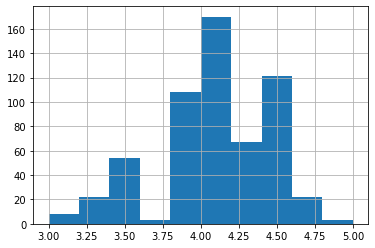

In [86]:
df.Rating.hist()

<AxesSubplot:>

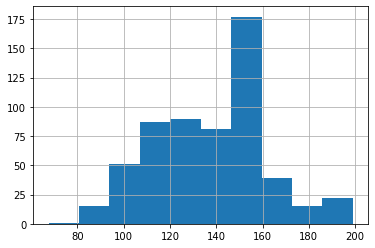

In [148]:
df['Salary Estimate'].hist()

<AxesSubplot:>

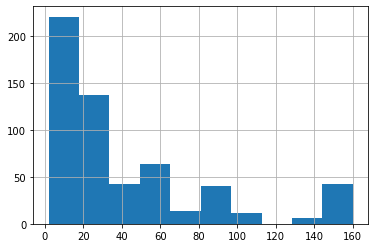

In [149]:
df.Company_Year.hist()

<AxesSubplot:>

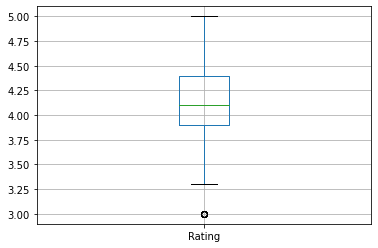

In [150]:
df.boxplot(column=['Rating']) 

<AxesSubplot:>

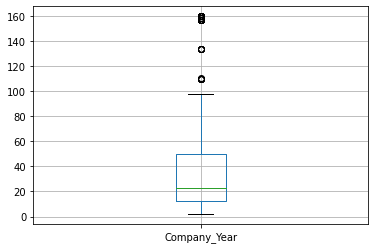

In [94]:
df.boxplot(column=['Company_Year']) 

<AxesSubplot:>

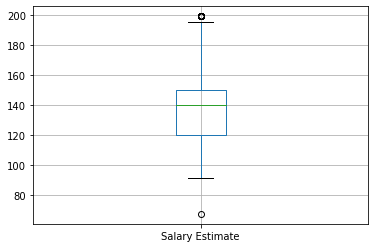

In [151]:
df.boxplot(column=['Salary Estimate']) 

In [152]:
#let's find relation b/w continious variables 
df[['Company_Year', 'Salary Estimate', 'Rating']].corr()

,Company_Year,Salary Estimate,Rating
Company_Year,1.000000,-0.125378,-0.302390
Salary Estimate,-0.125378,1.000000,-0.026399
Rating,-0.302390,-0.026399,1.000000


<AxesSubplot:>

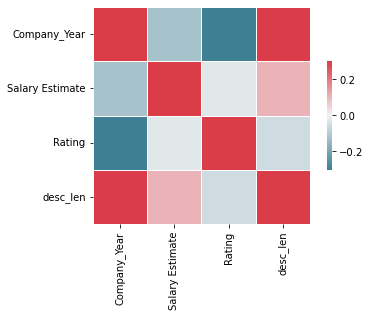

In [107]:
#lets use heatmap instead
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['Company_Year','Salary Estimate','Rating','desc_len']].corr(),vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

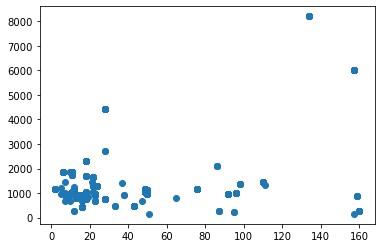

In [153]:
plt.scatter(df['Company_Year'], df['desc_len'])

In [154]:
#now let's see relation between catagorical variables
#let's create a new dataframe for catagorical variables
df.columns

Index(['index', 'Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Size', 'Founded', 'Type of ownership', 'Industry',
       'Sector', 'Revenue', 'Job_country', 'Job_state', 'Company_Year',
       'python_yn', 'visualization_yn', 'Excel_yn', 'analysis_yn',
       'communication_yn', 'aws_yn', 'desc_len', 'Job_Title', 'seniority'],
      dtype='object')

In [155]:
df_cat = df[['Job_country','Job_state','Company Name','Type of ownership','Industry','Sector','python_yn', 'visualization_yn', 'Excel_yn', 'analysis_yn',
       'communication_yn', 'aws_yn','Job_Title', 'seniority' ]]

graph for Job_country: total=37


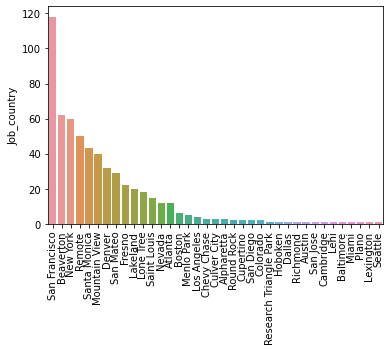

graph for Job_state: total=18


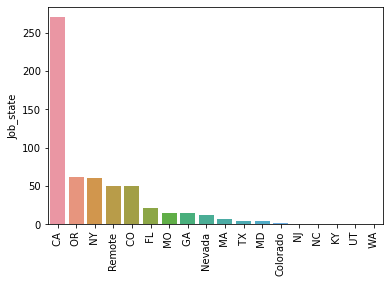

graph for Company Name: total=60


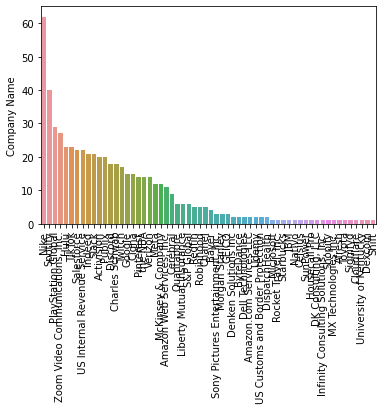

graph for Type of ownership: total=5


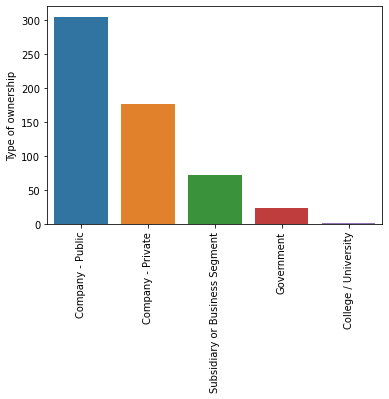

graph for Industry: total=29


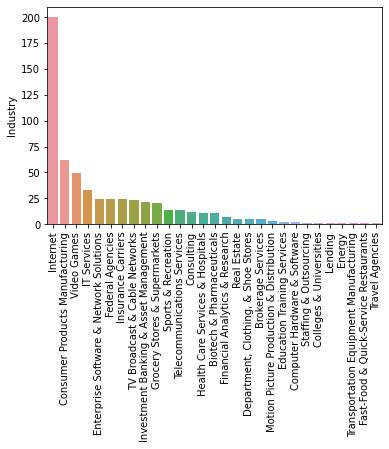

graph for Sector: total=17


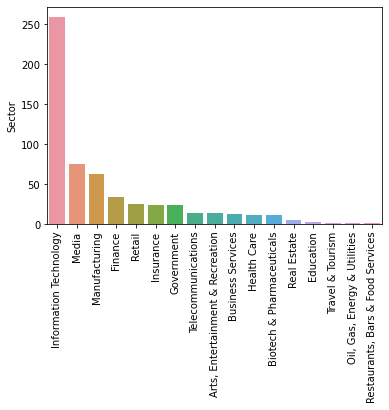

graph for python_yn: total=2


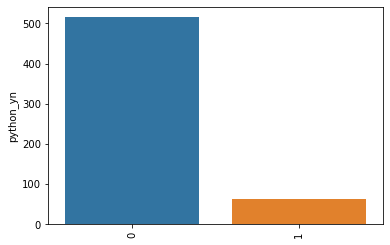

graph for visualization_yn: total=2


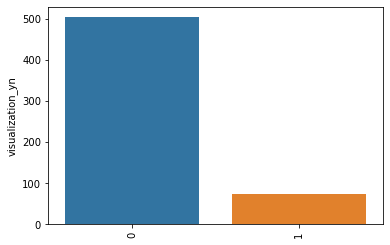

graph for Excel_yn: total=2


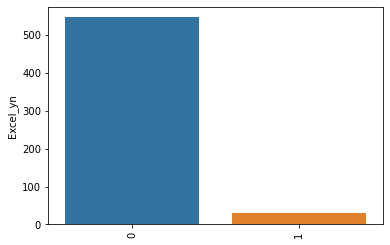

graph for analysis_yn: total=2


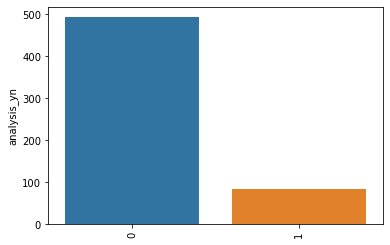

graph for communication_yn: total=2


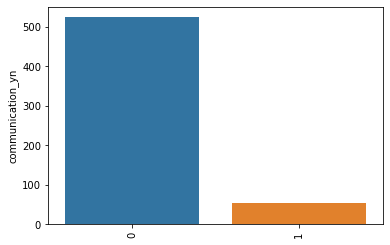

graph for aws_yn: total=2


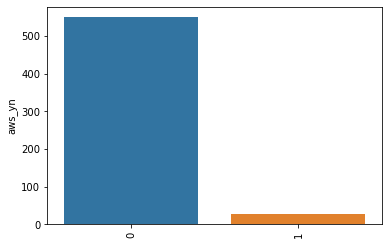

graph for Job_Title: total=5


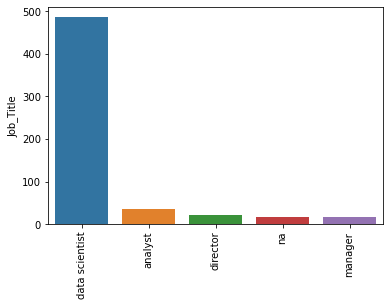

graph for seniority: total=2


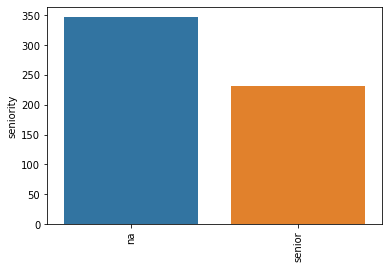

In [132]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total=%d"%(i,len(cat_num)))
    chart = sns.barplot(x=cat_num.index,y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

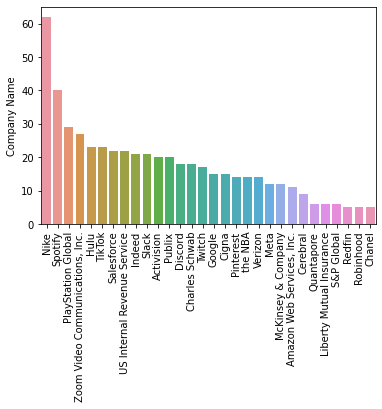

In [156]:
#let's plaot for top 30 company
cat_num = df_cat['Company Name'].value_counts()[:30]
chart_company = sns.barplot(x=cat_num.index,y=cat_num)
chart_company.set_xticklabels(chart_company.get_xticklabels(), rotation=90)
plt.show()

In [257]:
#let's use pivot table to summarize numeric variable on the basis of categorical variable
pd.pivot_table(df, index = ['Job_Title'], values='Salary Estimate')

,Salary Estimate
Job_Title,
analyst,118.589771
data scientist,136.886119
director,199.000000
manager,97.491667


In [190]:
pd.pivot_table(df,index=['Job_country','Job_Title'],values='Salary Estimate').sort_values('Salary Estimate', ascending=False)


,,Salary Estimate
Job_country,Job_Title,
Beaverton,director,199.000000
Lone Tree,data scientist,181.500000
Miami,data scientist,170.000000
Nevada,data scientist,170.000000
Boston,data scientist,156.400000
Colorado,data scientist,154.000000
Remote,data scientist,152.650000
Denver,data scientist,150.200000
San Jose,data scientist,147.455000


In [187]:
pd.pivot_table(df,index=['Job_country','Job_Title'],values='Salary Estimate')

Salary Estimate
Job_country            Job_Title                      
Alpharetta             data scientist       116.904000
Atlanta                data scientist       125.043000
Austin                 data scientist       106.721000
Baltimore              data scientist        97.025000
Beaverton              analyst               97.104000
                       data scientist       132.085714
                       director             199.000000
Boston                 data scientist       156.400000
Cambridge              data scientist       130.357000
Chevy Chase            data scientist       108.578000
Colorado               data scientist       154.000000
Culver City            data scientist        96.004000
Cupertino              data scientist       143.696000
Dallas                 data scientist       109.095000
Denver                 data scientist       150.200000
Fresno                 data scientist       140.014000
Hoboken                data scientist       142.500000
Lakeland               data scientist       120.445000
Lehi                   data scientist        93.606000
Lexington              data scientist        67.548000
Lone Tree              analyst              132.750000
                       data scientist       181.500000
Los Angeles            data scientist       116.539500
Menlo Park             data scientist       130.758000
Miami                  data scientist       170.000000
Mountain View          data scientist       126.996500
Nevada                 data scientist       170.000000
New York               data scientist       119.041250
Plano                  data scientist       114.867000
Remote                 data scientist       152.650000
Research Triangle Park data scientist        92.332000
Richmond               data scientist       117.492000
Round Rock             data scientist       102.356000
Saint Louis            data scientist       127.700000
San Diego              data scientist       121.165000
San Francisco          data scientist       140.630410
                       manager               97.491667
San Jose               data scientist       147.455000
San Mateo              analyst              119.944000
                       data scientist       134.274000
Santa Monica           data scientist       143.989419
Seattle                data scientist       115.903000

In [186]:
pd.pivot_table(df,index=['Job_country','Job_Title'],values='Salary Estimate',aggfunc='count')

Salary Estimate
Job_country            Job_Title                      
Alpharetta             data scientist                3
Atlanta                data scientist               12
Austin                 data scientist                1
Baltimore              data scientist                1
Beaverton              analyst                       6
                       data scientist               35
                       director                     21
Boston                 data scientist                6
Cambridge              data scientist                1
Chevy Chase            data scientist                3
Colorado               data scientist                2
Culver City            data scientist                3
Cupertino              data scientist                2
Dallas                 data scientist                1
Denver                 data scientist               32
Fresno                 data scientist               22
Hoboken                data scientist                1
Lakeland               data scientist               20
Lehi                   data scientist                1
Lexington              data scientist                1
Lone Tree              analyst                       7
                       data scientist               11
Los Angeles            data scientist                4
Menlo Park             data scientist                5
Miami                  data scientist                1
Mountain View          data scientist               40
Nevada                 data scientist               12
New York               data scientist               60
Plano                  data scientist                1
Remote                 data scientist               50
Research Triangle Park data scientist                1
Richmond               data scientist                1
Round Rock             data scientist                2
Saint Louis            data scientist               15
San Diego              data scientist                2
San Francisco          data scientist              100
                       manager                      18
San Jose               data scientist                1
San Mateo              analyst                      22
                       data scientist                7
Santa Monica           data scientist               43
Seattle                data scientist                1

In [194]:
df.columns

Index(['index', 'Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Size', 'Founded', 'Type of ownership', 'Industry',
       'Sector', 'Revenue', 'Job_country', 'Job_state', 'Company_Year',
       'python_yn', 'visualization_yn', 'Excel_yn', 'analysis_yn',
       'communication_yn', 'aws_yn', 'desc_len', 'Job_Title', 'seniority'],
      dtype='object')

In [195]:
df_pivots = df[['Rating', 'Type of ownership', 'Industry','Sector','Revenue','python_yn', 'visualization_yn', 'Excel_yn', 'analysis_yn',
       'communication_yn', 'aws_yn', 'desc_len', 'Job_Title', 'seniority']]

In [201]:
for i in df_pivots:
    print(i)
    print(pd.pivot_table(df,index=i,values='Salary Estimate').sort_values('Salary Estimate', ascending = False))

Rating
        Salary Estimate
Rating                 
4.6          150.200000
4.1          149.755779
4.9          147.455000
3.6          144.809000
3.5          143.878444
3.9          141.994772
3.0          136.394250
4.4          135.092654
4.0          134.112107
3.8          133.912765
3.3          130.356000
4.2          129.710687
4.5          127.574725
4.3          118.566947
3.4          111.199000
5.0          109.527500
4.7           93.606000
Type of ownership
                                Salary Estimate
Type of ownership                              
Company - Public                     142.821256
Government                           137.390167
Subsidiary or Business Segment       130.131722
Company - Private                    129.433051
College / University                  67.548000
Industry
                                          Salary Estimate
Industry                                                 
Staffing & Outsourcing                         170.000000


In [205]:
pd.pivot_table(df,index='Revenue',columns='visualization_yn',values='Salary Estimate',aggfunc='count')

visualization_yn,0,1
Revenue,,
$1 to $2 billion (USD),NaN,23.0
$1 to $5 million (USD),24.0,NaN
$10+ billion (USD),217.0,30.0
$100 to $500 million (USD),24.0,NaN
$2 to $5 billion (USD),31.0,21.0
$25 to $50 million (USD),3.0,NaN
$5 to $10 billion (USD),9.0,NaN
$5 to $10 million (USD),1.0,NaN
$500 million to $1 billion (USD),20.0,NaN


In [ ]:
!pip install wordcloud
!pip install nltk
!pip install stopwords
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [ ]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()